#### In this case study Natural Language Processing methods will be used to analyze yelp reviews
#### Number of 'stars' indicate the rating given by a customer
#### 'Cool', 'Useful' indicate the number of cool votes given by other Yelp Users - assessment of the quality of the reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
yelp_df = pd.read_csv('yelp.csv')

In [3]:
yelp_df.head(7)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
5,-yxfBYGB6SEqszmxJxd97A,2007-12-13,m2CKSsepBCoRYWxiRUsxAg,4,"Quiessence is, simply put, beautiful. Full wi...",review,sqYN3lNgvPbPCTRsMFu27g,4,3,1
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


In [4]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [5]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [7]:
yelp_df['text'][1]

'I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\n\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we\'ll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here\'s The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the ca

In [8]:
yelp_df['text'][9999]

'4-5 locations.. all 4.5 star average.. I think Arizona really has some fantastic Pizza options, and Spinatos is at the top of my pizza fix list.. the semi sweet sauce is addictive, great service, fresh ingredients, The Spicy Italian is my favorite... The chocolate chips cookies are laced with mind altering drugs, that make your body parts"romantic" when you think of their cookies.. BTW 5:30pm, on a Tuesday, when we left, a 30 minute wait.. Its on the List..'

In [10]:
#New column indicating length of review
yelp_df['len_of_rev'] = yelp_df['text'].apply(len)

<AxesSubplot:ylabel='Frequency'>

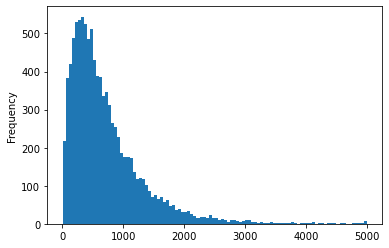

In [12]:
yelp_df['len_of_rev'].plot(bins = 100, kind = 'hist')
#Most of the people wrote reviews that are between 0 to 700 words

In [16]:
yelp_df['len_of_rev'].describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: len_of_rev, dtype: float64

In [17]:
yelp_df['len_of_rev'].describe()['max']

4997.0

In [27]:
#Find the text with the most number of characters
yelp_df[yelp_df.len_of_rev == 4997.0]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [28]:
#Find the review with the minimum number of characters
yelp_df['len_of_rev'].describe()['min']

1.0

In [29]:
yelp_df[yelp_df.len_of_rev == 1.0]['text'].iloc[0]

'X'

In [30]:
#Find the review with the mean number of characters
yelp_df['len_of_rev'].describe()['mean']

710.7387

In [31]:
yelp_df[yelp_df.len_of_rev == 710 ]['text'].iloc[0]

"I went here for lunch a couple of weeks ago with my bosses. It was packed on a Friday - we sat at the bar and our cook was fantastic! We got to sit and chat with him while he worked away at the orders. I had the chicken pesto pasty and it was wonderful! the bread used is similar to a pastry dough type...but not as sweet. The pasty was so filling, I could barely finish it.\n\nMy bosses have been there before and have always wanted to try the peanut butter and jelly pasty - so we all split it as dessert and it was so good. They put bananas in it and drizzle jelly over the whole pasty. It's definitely rich and gooey. \n\nI would totally go back here again and have told my friends about it too! Amazing place."

<AxesSubplot:xlabel='count', ylabel='stars'>

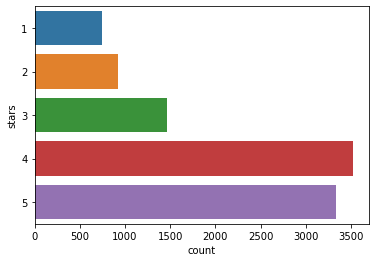

In [32]:
sns.countplot(y = 'stars', data = yelp_df)

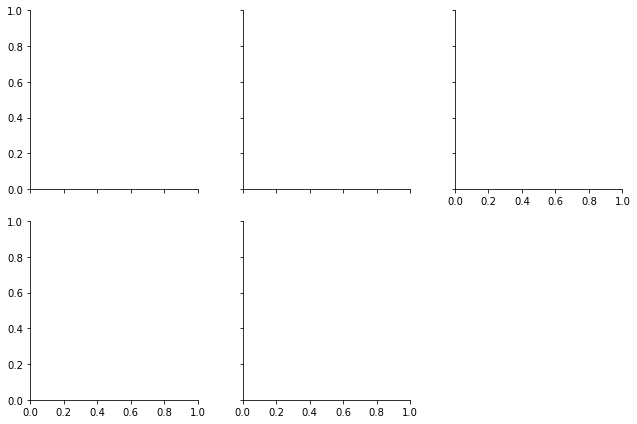

In [34]:
g = sns.FacetGrid(data = yelp_df, col = 'stars', col_wrap=3)

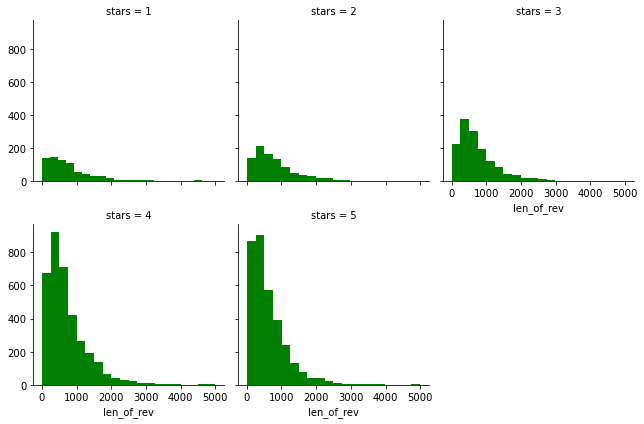

In [36]:
g = sns.FacetGrid(data = yelp_df, col = 'stars', col_wrap=3)
g.map(plt.hist, 'len_of_rev',bins = 20, color = 'g')

In [39]:
yelp_df_1 = yelp_df[yelp_df['stars']==1]
yelp_df_1

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,len_of_rev
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
...,...,...,...,...,...,...,...,...,...,...,...
9924,mhQCxOiqp03qnhGRTtPduw,2012-07-07,PCjnn__E8AzNa2kXFXxTHQ,1,Horrible service.,review,rvaJcf5OIY2So_pkoqDHLQ,0,1,0,17
9931,C_eWAEOvkHZ_IZYGwjtpmg,2011-04-25,QfdoE-XqEeCsttJH8g0ugQ,1,I love Saddle Ranch for its casual night time ...,review,yhGfcKunPjcy-v-1ppr6oQ,0,2,0,995
9953,QCxXYA13PtkD3wec47_r8Q,2012-03-14,V2N2TCqnaqMYfg7zXGG-Rg,1,"""Hipster,Trendy"" ????-I think NOT !!!! Very di...",review,JEQ6el2-tLtKJU6k_SpE-w,0,2,0,296
9984,wepFVY82q_tuDzG6lQjHWw,2012-02-12,spusZYROtBKw_5tv3gYm4Q,1,Went last night to Whore Foods to get basics t...,review,W7zmm1uzlyUkEqpSG7PlBw,0,1,2,1673


In [40]:
yelp_df_5 = yelp_df[yelp_df['stars']==5]
yelp_df_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,len_of_rev
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
...,...,...,...,...,...,...,...,...,...,...,...
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1,263
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0,908
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2,1326
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1,1968


In [42]:
yelp_df_1_5 = pd.concat([yelp_df_1,yelp_df_5])

In [45]:
yelp_df_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  len_of_rev   4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [49]:
print('1 Stars Review Percentage =', len(yelp_df_1)/len(yelp_df_1_5)*100, '%')

1 Stars Review Percentage = 18.330885952031327 %


In [50]:
print('5 Stars Review Percentage =', len(yelp_df_5)/len(yelp_df_1_5)*100, '%')

5 Stars Review Percentage = 81.66911404796868 %


<AxesSubplot:xlabel='count', ylabel='stars'>

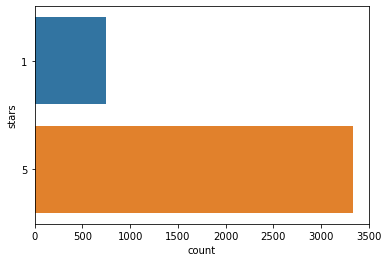

In [51]:
sns.countplot(y = 'stars', data = yelp_df_1_5)

## Remove Punctuation 

In [52]:
import string

In [53]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
Test_string = 'Hello, my name is not Arjun, Who am I?, Tell me!'

In [60]:
Test_no_punc = [ char for char in Test_string  if char not in string.punctuation ]

In [61]:
Test_no_punc

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'm',
 'y',
 ' ',
 'n',
 'a',
 'm',
 'e',
 ' ',
 'i',
 's',
 ' ',
 'n',
 'o',
 't',
 ' ',
 'A',
 'r',
 'j',
 'u',
 'n',
 ' ',
 'W',
 'h',
 'o',
 ' ',
 'a',
 'm',
 ' ',
 'I',
 ' ',
 'T',
 'e',
 'l',
 'l',
 ' ',
 'm',
 'e']

In [62]:
Test_no_punc = ''.join(Test_no_punc)

In [63]:
Test_no_punc

'Hello my name is not Arjun Who am I Tell me'

## Remove stop words 

In [66]:
from nltk.corpus import stopwords 
stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [68]:
Test_no_punc_stops_removed = [word for word in Test_no_punc.split() if word.lower() not in stopwords.words('English')]

In [69]:
Test_no_punc_stops_removed

['Hello', 'name', 'Arjun', 'Tell']

## Count Vectorizer 

In [70]:
sample_data = ['This is the first document.', 'This document is the second document', 'After the first document and second document comes the third document']

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [72]:
X

<3x10 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [73]:
print(vectorizer.get_feature_names())

['after', 'and', 'comes', 'document', 'first', 'is', 'second', 'the', 'third', 'this']


In [74]:
print(X.toarray())

[[0 0 0 1 1 1 0 1 0 1]
 [0 0 0 2 0 1 1 1 0 1]
 [1 1 1 3 1 0 1 2 1 0]]


In [75]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_clean = [ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('English')]
    return Test_punc_removed_clean

In [76]:
yelp_df_1_5_clean = yelp_df_1_5['text'].apply(message_cleaning)

In [77]:
print(yelp_df_1_5_clean[0])

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [78]:
print(yelp_df_1_5['text'][0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [79]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
yelp_count_vectorized = vectorizer.fit_transform(yelp_df_1_5['text'])

In [80]:
print(yelp_count_vectorized.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [81]:
yelp_count_vectorized.shape

(4086, 26435)

In [83]:
vectorizer.get_feature_names()

['0',
 '00s',
 '01042012',
 '022010',
 '03342',
 '05',
 '050',
 '06',
 '07092008',
 '075',
 '09',
 '090',
 '095',
 '1',
 '10',
 '100',
 '1000',
 '10000',
 '1000am',
 '1000pm',
 '1000x',
 '1001',
 '100150',
 '1007',
 '100s',
 '100th',
 '101',
 '1011',
 '1012',
 '101412',
 '1015',
 '102',
 '1025',
 '1030',
 '103011',
 '1030pm',
 '10312012',
 '105',
 '105°',
 '1070',
 '108',
 '109',
 '1095',
 '1099',
 '10Shrimp',
 '10X',
 '10am',
 '10am4pm',
 '10close',
 '10each',
 '10gallon',
 '10ish',
 '10min',
 '10mins',
 '10minutes',
 '10person',
 '10pm',
 '10pm12am',
 '10th',
 '10thand',
 '10yard',
 '10yo',
 '11',
 '110',
 '1100',
 '1100am',
 '1103',
 '111',
 '1113',
 '1115',
 '1118',
 '111807',
 '111809',
 '111909',
 '111PM',
 '111th',
 '112',
 '112312',
 '1125',
 '1130',
 '1130am',
 '1135',
 '1139',
 '114',
 '1141',
 '1145',
 '115',
 '1150',
 '1152',
 '1154',
 '1155',
 '115th',
 '116',
 '118',
 '1182010',
 '1199',
 '11991079',
 '11AM',
 '11PM',
 '11a3p',
 '11am',
 '11ish',
 '11person',
 '11pm',
 '1

In [84]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
label = yelp_df_1_5['stars'].values

In [85]:
label

array([1, 1, 1, ..., 5, 5, 5], dtype=int64)

In [86]:
NB_classifier.fit(yelp_count_vectorized, label)

MultinomialNB()

In [88]:
testing_sample = ['Excellent delicious food! Highly recommended']
testing_sample_count_vectorizer = vectorizer.transform(testing_sample)

In [89]:
testing_sample_count_vectorizer 

<1x26435 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [90]:
test_predict = NB_classifier.predict(testing_sample_count_vectorizer)

In [91]:
test_predict

array([5], dtype=int64)

In [95]:
testing_sample_2 = ['Bad food! Wont recommended']
testing_sample_count_vectorizer_2 = vectorizer.transform(testing_sample_2)

In [96]:
test_predict = NB_classifier.predict(testing_sample_count_vectorizer_2)

In [97]:
test_predict

array([1], dtype=int64)

### Model Training 

In [103]:
X = yelp_count_vectorized 
y = label

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [105]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

### Model Evaluation 

In [109]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([1, 5, 5, ..., 5, 5, 5], dtype=int64)

<AxesSubplot:>

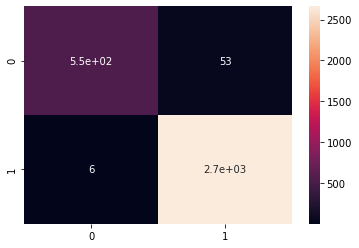

In [110]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)